This script pre-processes the German Traffic Sign Recognition Benchmark (GTSRB) available at Kaggle (https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign). The original dataset contains image files as well as metadata files. As the images capture scenes larger than the traffic signs, the metadata files contain coordinates to locate the traffic sign within each image. By cropping images with these coordinates, I expect I can reduce noise in data and enhance training result.

In [1]:
import os

print(os.listdir('/notebooks'))

['gtsrb', 'gtsrb-german-traffic-sign.zip', 'gtsrb-preprocessed']


In [2]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
print(cv2.__version__)

4.1.1


In [3]:
SOURCE_DIR = '/notebooks/gtsrb/'
OUT_DIR = '/notebooks/gtsrb-preprocessed/'
TRAIN_META_FILE = SOURCE_DIR + "Train.csv"
TEST_META_FILE = SOURCE_DIR + "Test.csv"

In [4]:
df_train = pd.read_csv(TRAIN_META_FILE, delimiter=',')
print(df_train.shape)
df_train.head()

(39209, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [5]:
df_test = pd.read_csv(TEST_META_FILE, delimiter=',')
print(df_test.shape)
df_test.head()

(12630, 8)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [6]:
def confirm_preprocessed_images(_df, _rowcnt, _srcdir = SOURCE_DIR):
    '''
    Crop 처리가 잘 되는지 눈으로 확인
    '''
    _df_size = len(_df.index)
    if (_df_size < _rowcnt):
        _rowcnt = _df_size
        
    for _, _row in _df.sample(_rowcnt).iterrows():
        _filename = _row['Path'].lower()
        _classId = _row['ClassId']
        _x1 = _row['Roi.X1']
        _x2 = _row['Roi.X2']
        _y1 = _row['Roi.Y1']
        _y2 = _row['Roi.Y2']
    
        _img = cv2.imread(_srcdir + _filename)
        _crop_img = _img[_y1:_y2, _x1:_x2]
    
        _f, _ax = plt.subplots(1, 2, figsize=(5,12))
        _ax[0].imshow(_img)
        _ax[0].set_title('original')
        _ax[1].imshow(_crop_img)
        _ax[1].set_title('cropped')
        plt.show()

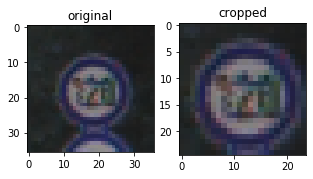

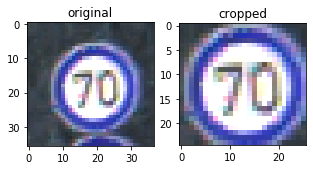

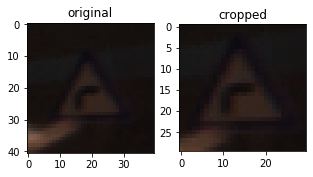

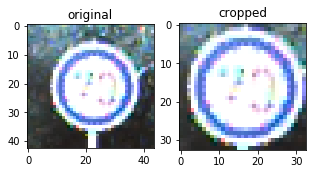

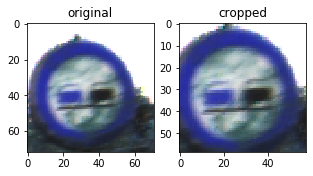

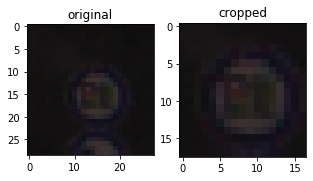

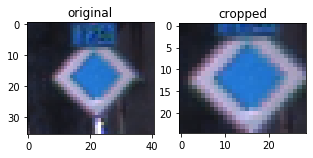

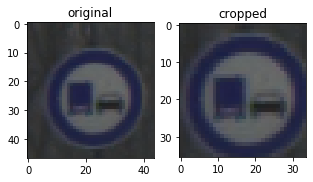

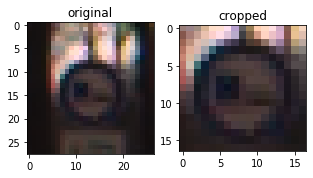

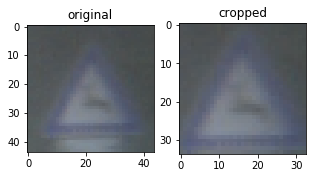

In [7]:
confirm_preprocessed_images(df_train, 10)

In [8]:
def write_preprocessed_images(_df, _srcdir=SOURCE_DIR, _outdir=OUT_DIR):
    '''
    Crop 처리된 이미지를 저장한다.
    '''
    for _, _row in _df.iterrows():
        _filename = _row['Path'].lower()
        _classId = _row['ClassId']
        _x1 = _row['Roi.X1']
        _x2 = _row['Roi.X2']
        _y1 = _row['Roi.Y1']
        _y2 = _row['Roi.Y2']
    
        _img = cv2.imread(_srcdir + _filename)
        _crop_img = _img[_y1:_y2, _x1:_x2]
    
        if not cv2.imwrite(_outdir + _filename, _crop_img):
            raise Exception("Could not write image: {}".format(_filename))

In [9]:
write_preprocessed_images(df_train)

In [10]:
write_preprocessed_images(df_test)